In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


sns.set_theme()
%matplotlib  inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_data_set.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df['Gender'][df['Gender'].isnull()] = df['Gender'].dropna().sample(df['Gender'].isnull().sum()).values
df['Married'][df['Married'].isnull()] = df['Married'].dropna().sample(df['Married'].isnull().sum()).values
df['Dependents'][df['Dependents'].isnull()] = df['Dependents'].dropna().sample(df['Dependents'].isnull().sum()).values
df['Self_Employed'][df['Self_Employed'].isnull()] = df['Self_Employed'].dropna().sample(df['Self_Employed'].isnull().sum()).values
df['LoanAmount'][df['LoanAmount'].isnull()] = df['LoanAmount'].dropna().sample(df['LoanAmount'].isnull().sum()).values
df['Loan_Amount_Term'][df['Loan_Amount_Term'].isnull()] = df['Loan_Amount_Term'].dropna().sample(df['Loan_Amount_Term'].isnull().sum()).values
df['Credit_History'][df['Credit_History'].isnull()] = df['Credit_History'].dropna().sample(df['Credit_History'].isnull().sum()).values

In [6]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df['Dependents'].replace('3+', '3', inplace=True)

In [8]:
df['Dependents'].head(10)

0    0
1    1
2    0
3    0
4    0
5    2
6    0
7    3
8    2
9    1
Name: Dependents, dtype: object

In [9]:
df['Dependents'] = df['Dependents'].astype('float')

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Property_Area'] = le.fit_transform(df['Property_Area'])

In [11]:
df['Property_Area'].head(10)

0    2
1    0
2    2
3    2
4    2
5    2
6    2
7    1
8    2
9    1
Name: Property_Area, dtype: int64

In [12]:
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [13]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [14]:
le = LabelEncoder()
df['Married'] = le.fit_transform(df['Married'])

In [15]:
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])

In [16]:
le = LabelEncoder()
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [18]:
df.drop('Loan_ID', inplace=True, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


#Handling Outliers

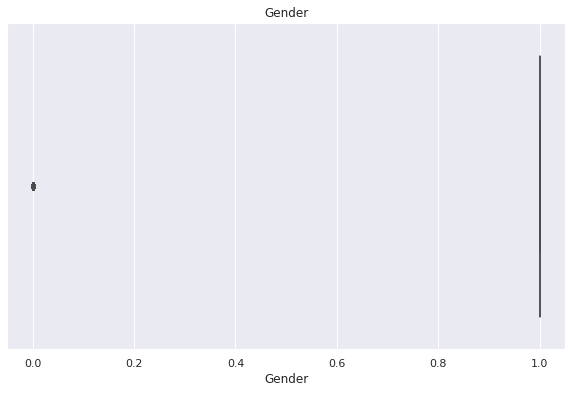

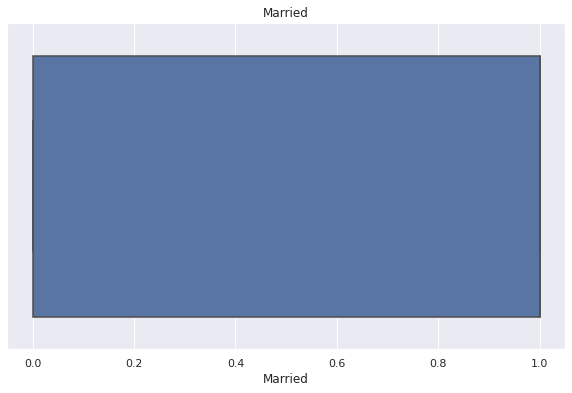

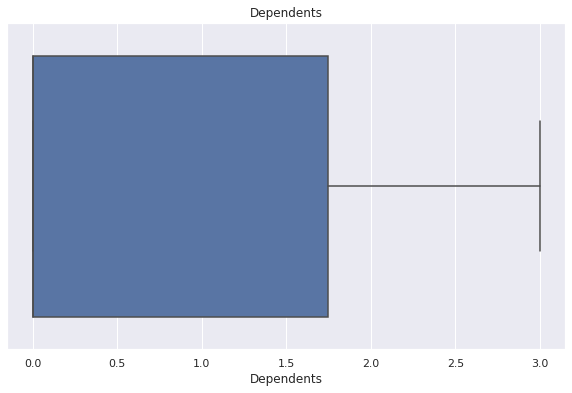

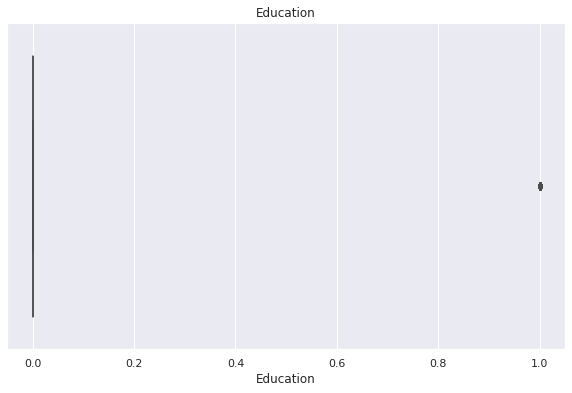

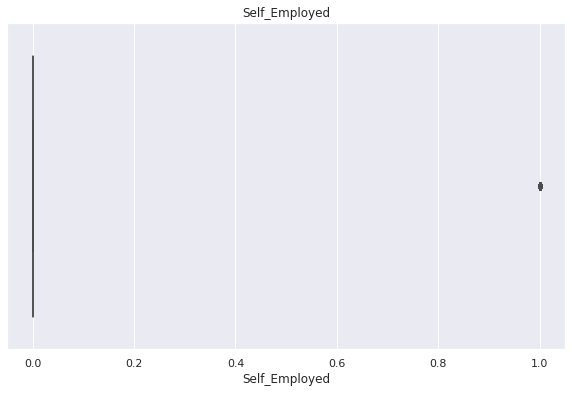

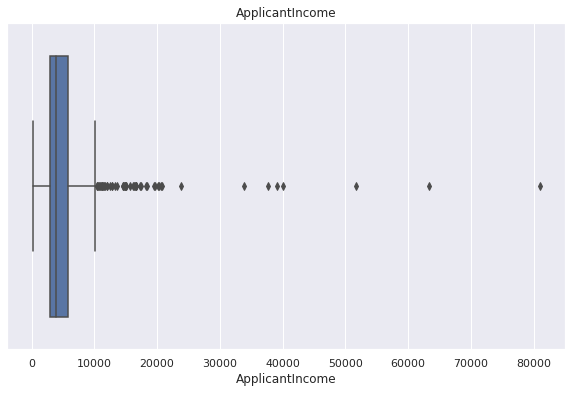

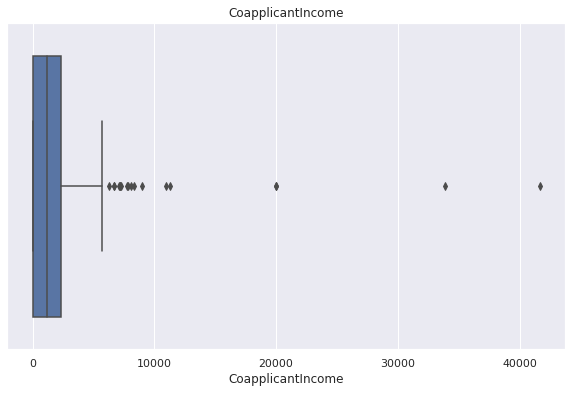

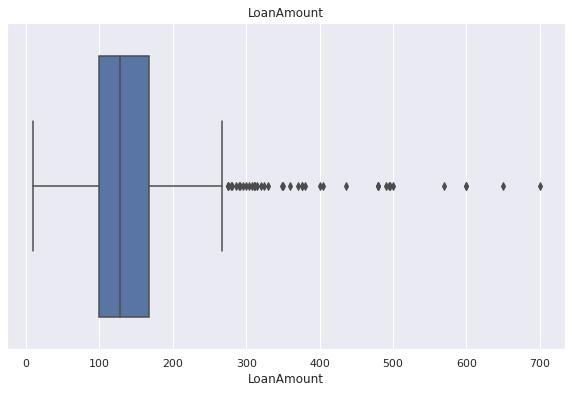

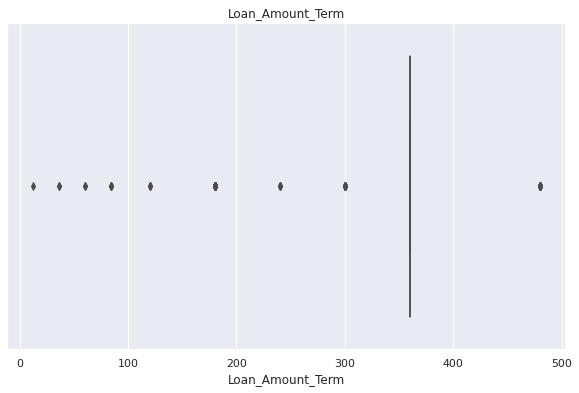

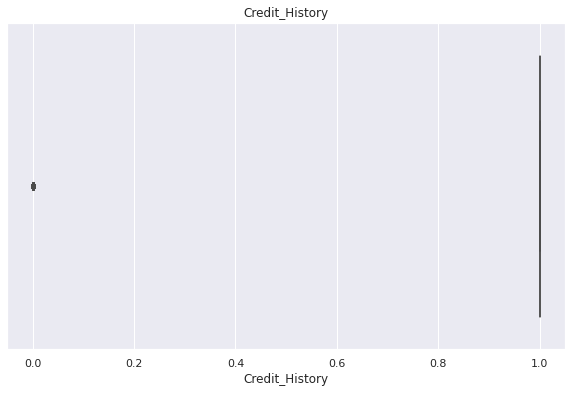

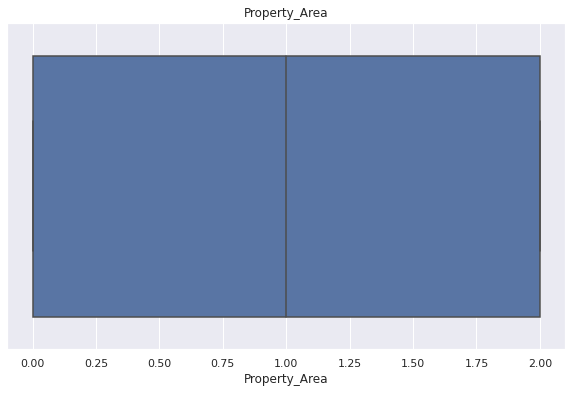

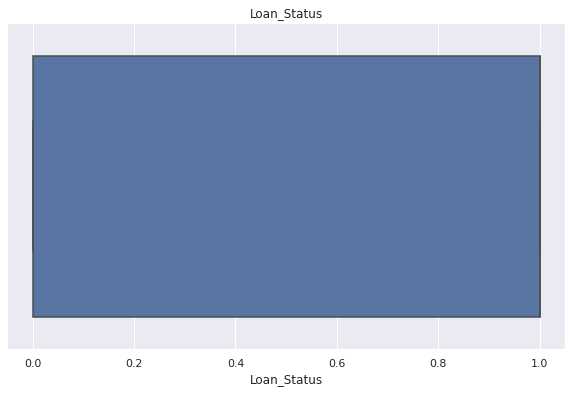

In [19]:
for col in df:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

1. Applicant Income

In [20]:
IQR = df.ApplicantIncome.quantile(0.75) - df.ApplicantIncome.quantile(0.25)
lower_bridge = df.ApplicantIncome.quantile(0.25)-(1.5*IQR)
upper_bridge = df.ApplicantIncome.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 2917.5
lower_bridge : -1498.75
upper_bridge : 10171.25


In [21]:
df.loc[df['ApplicantIncome'] <=-1498.75,'ApplicantIncome'] = -1498.75
df.loc[df['ApplicantIncome'] >= 10171.25,'ApplicantIncome'] = 10171.25 

2. Coapplicant Income

In [22]:
IQR = df.CoapplicantIncome.quantile(0.75) - df.CoapplicantIncome.quantile(0.25)
lower_bridge = df.CoapplicantIncome.quantile(0.25)-(1.5*IQR)
upper_bridge = df.CoapplicantIncome.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 2297.25
lower_bridge : -3445.875
upper_bridge : 5743.125


In [23]:
df.loc[df['CoapplicantIncome'] <= -3445.875,'CoapplicantIncome'] = -3445.875
df.loc[df['CoapplicantIncome'] >= 5743.125,'CoapplicantIncome'] = 5743.125

3. LoanAmount

In [24]:
IQR = df.LoanAmount.quantile(0.75) - df.LoanAmount.quantile(0.25)
lower_bridge = df.LoanAmount.quantile(0.25)-(1.5*IQR)
upper_bridge = df.LoanAmount.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 68.0
lower_bridge : -2.0
upper_bridge : 270.0


In [25]:
df.loc[df['LoanAmount'] <= 1.0,'LoanAmount'] = 1.0
df.loc[df['LoanAmount'] >= 266.0,'LoanAmount'] = 266.0 

4. Loan_Amount_Term

In [26]:
IQR = df.Loan_Amount_Term.quantile(0.75) - df.Loan_Amount_Term.quantile(0.25)
lower_bridge = df.Loan_Amount_Term.quantile(0.25)-(1.5*IQR)
upper_bridge = df.Loan_Amount_Term.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 0.0
lower_bridge : 360.0
upper_bridge : 360.0


In [27]:
df.loc[df['Loan_Amount_Term'] <= 360.0,'Loan_Amount_Term'] = 360.0
df.loc[df['Loan_Amount_Term'] >= 360.0,'Loan_Amount_Term'] = 360.0 

5. Credit_History

In [28]:
IQR = df.Credit_History.quantile(0.75) - df.Credit_History.quantile(0.25)
lower_bridge = df.Credit_History.quantile(0.25)-(1.5*IQR)
upper_bridge = df.Credit_History.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 0.0
lower_bridge : 1.0
upper_bridge : 1.0


In [29]:
df.loc[df['Credit_History'] <= 1.0,'Credit_History'] = 1.0
df.loc[df['Credit_History'] >= 1.0,'Credit_History'] = 1.0 

6. Gender

In [30]:
IQR = df.Gender.quantile(0.75) - df.Gender.quantile(0.25)
lower_bridge = df.Gender.quantile(0.25)-(1.5*IQR)
upper_bridge = df.Gender.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 0.0
lower_bridge : 1.0
upper_bridge : 1.0


In [31]:
df.loc[df['Gender'] <= 0.0,'Gender'] = 0.0
df.loc[df['Gender'] >= 0.0,'Gender'] = 0.0 

7. Dependents

In [32]:
IQR = df.Dependents.quantile(0.75) - df.Dependents.quantile(0.25)
lower_bridge = df.Dependents.quantile(0.25)-(1.5*IQR)
upper_bridge = df.Dependents.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 1.75
lower_bridge : -2.625
upper_bridge : 4.375


In [33]:
df.loc[df['Dependents'] <= -1.5,'Dependents'] = -1.5
df.loc[df['Dependents'] >= 2.5 ,'Dependents'] = 2.5 

8. Education

In [34]:
IQR = df.Education.quantile(0.75) - df.Education.quantile(0.25)
lower_bridge = df.Education.quantile(0.25)-(1.5*IQR)
upper_bridge = df.Education.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 0.0
lower_bridge : 0.0
upper_bridge : 0.0


In [35]:
df.loc[df['Education'] <= 0.0,'Education'] = 0.0
df.loc[df['Education'] >= 0.0 ,'Education'] = 0.0 

9. Self Employed

In [36]:
IQR = df.Self_Employed.quantile(0.75) - df.Self_Employed.quantile(0.25)
lower_bridge = df.Self_Employed.quantile(0.25)-(1.5*IQR)
upper_bridge = df.Self_Employed.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 0.0
lower_bridge : 0.0
upper_bridge : 0.0


In [37]:
df.loc[df['Self_Employed'] <= 0.0,'Self_Employed'] = 0.0
df.loc[df['Self_Employed'] >= 0.0 ,'Self_Employed'] = 0.0 

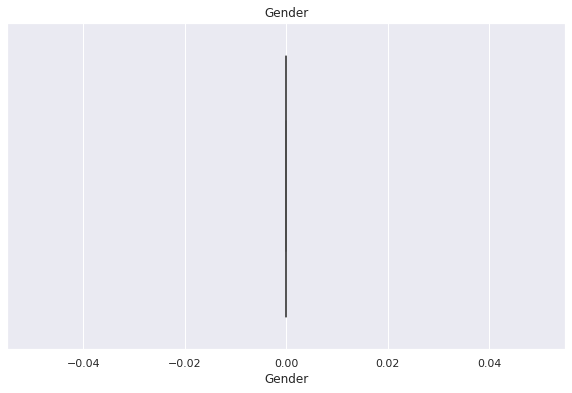

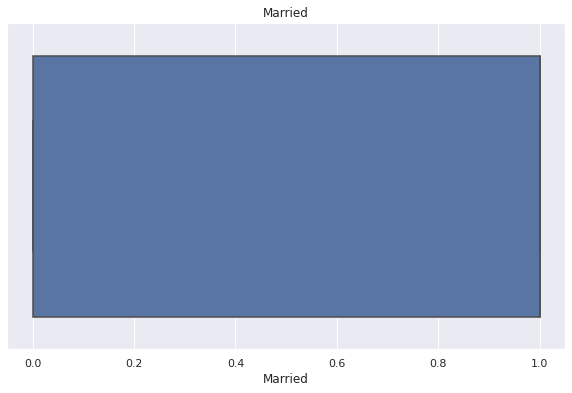

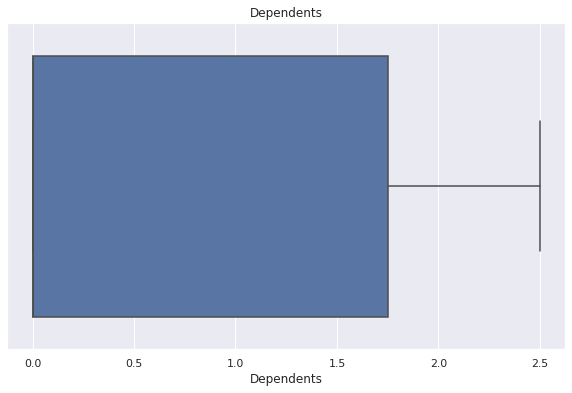

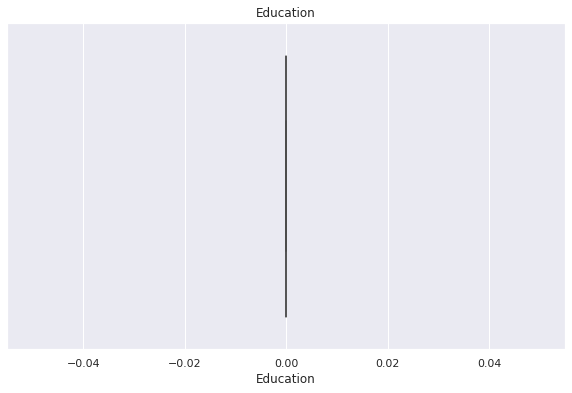

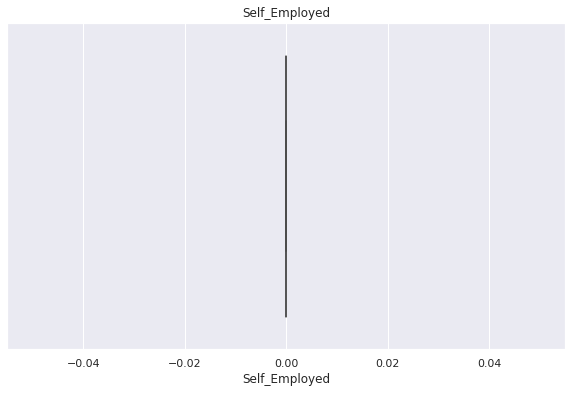

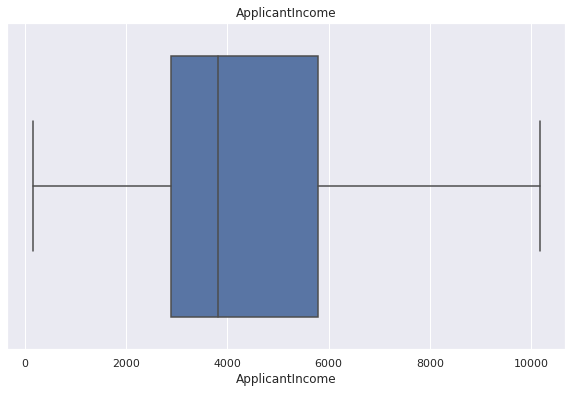

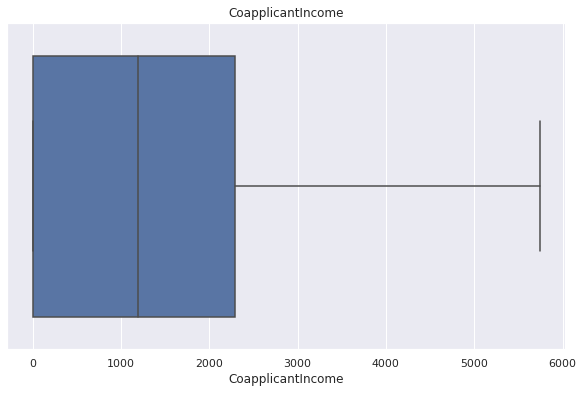

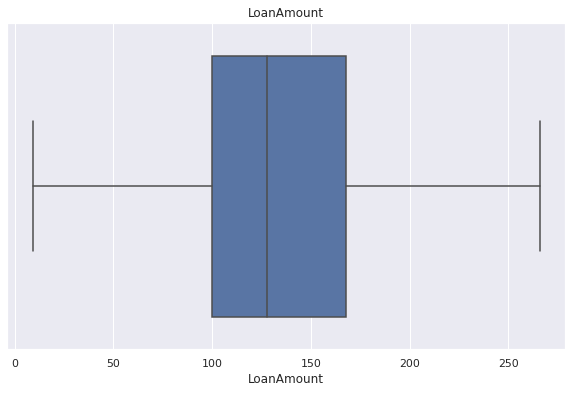

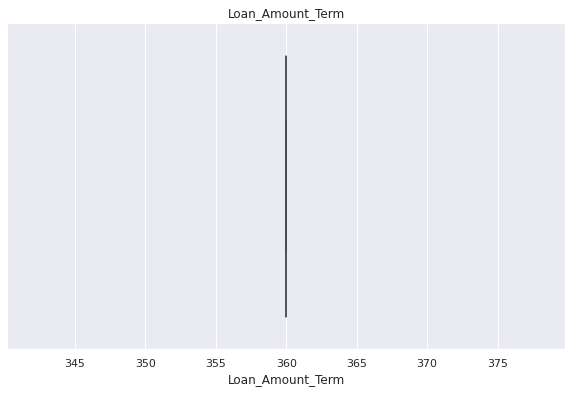

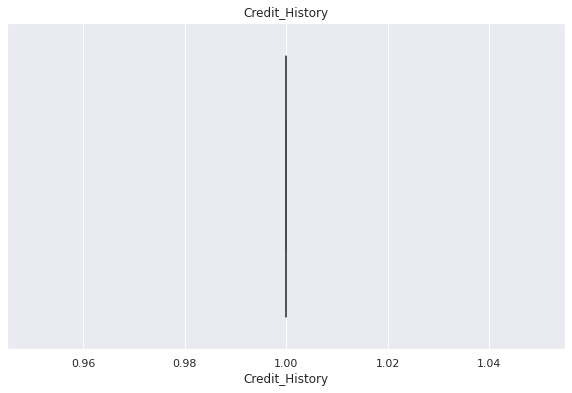

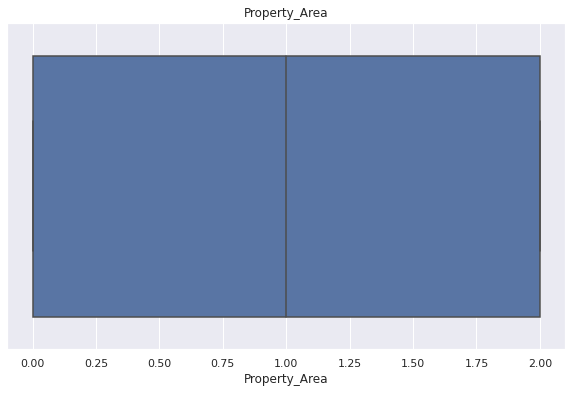

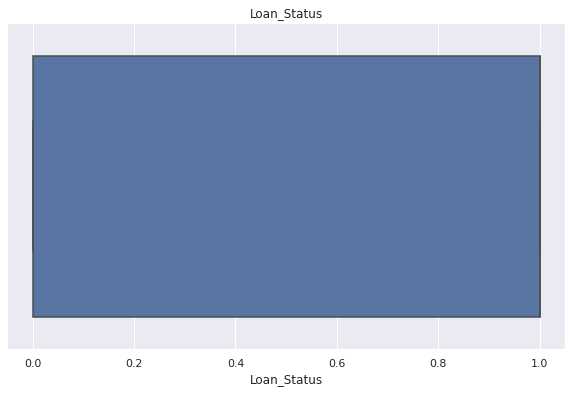

In [38]:
for col in df:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

#Feature Selection

In [39]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [40]:
x = df.loc[:, ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History','Property_Area']]

In [41]:
y = df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 1, test_size=0.20)

In [43]:
from sklearn.metrics import classification_report as cr , accuracy_score as acc , confusion_matrix as cm
lg = LogisticRegression()
lg.fit(xtrain, ytrain)
ypred= lg.predict(xtest)

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [46]:
logreg_cv = GridSearchCV(lg, param_grid, cv = 5)  
logreg_cv.fit(x, y)
print("Tuned Logistic Regression Parameters:{}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters:{'C': 1e-05}
Best score is 0.6872984139677463


In [47]:
import pickle
file = open('loan.pkl', 'wb')
pickle.dump(lg, file)
file.close()

In [48]:
model = open('loan.pkl', 'rb')
forest = pickle.load(model)

In [49]:
y_prediction = forest.predict(xtest)